# (1) Simple Linear Regression - Delivery Time

Q1) Delivery_time -> Predict delivery time using sorting time Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

In [65]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [66]:
import sklearn
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn.metrics import r2_score

In [68]:
dt = pd.read_csv("delivery_time.csv")

In [69]:
dt.head(5)

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [70]:
print (dt.shape,"Shape of Data Frame")

(21, 2) Shape of Data Frame


In [71]:
dt=dt.rename({'Delivery Time':'dtime','Sorting Time':'stime'},axis=1 )

In [72]:
dt.head(5)

,dtime,stime
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


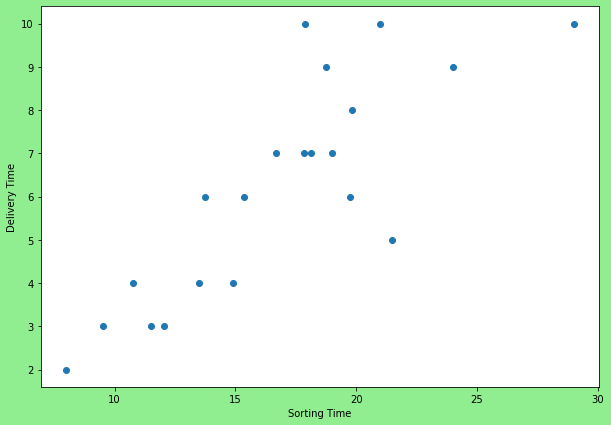

In [73]:
plt.figure(figsize=(10,7),facecolor="lightgreen")
plt.scatter(dt.dtime,dt.stime);
plt.xlabel("Sorting Time");
plt.ylabel("Delivery Time")
plt.show()

In [74]:
dt.corr()

,dtime,stime
dtime,1.000000,0.825997
stime,0.825997,1.000000


In [75]:
dt.shape

(21, 2)

# Creating model with SKLEARN

In [76]:
lm = LinearRegression()

X = dt["stime"].values.reshape(21,1)
Y = dt["dtime"].values.reshape(21,1)

reg_sklearn = lm.fit(X,Y)

In [77]:
X

array([[10],
       [ 4],
       [ 6],
       [ 9],
       [10],
       [ 6],
       [ 7],
       [ 3],
       [10],
       [ 9],
       [ 8],
       [ 4],
       [ 7],
       [ 3],
       [ 3],
       [ 4],
       [ 6],
       [ 7],
       [ 2],
       [ 7],
       [ 5]], dtype=int64)

In [78]:
Y

array([[21.  ],
       [13.5 ],
       [19.75],
       [24.  ],
       [29.  ],
       [15.35],
       [19.  ],
       [ 9.5 ],
       [17.9 ],
       [18.75],
       [19.83],
       [10.75],
       [16.68],
       [11.5 ],
       [12.03],
       [14.88],
       [13.75],
       [18.11],
       [ 8.  ],
       [17.83],
       [21.5 ]])

In [79]:
print (reg_sklearn.coef_)
print (reg_sklearn.intercept_)

[[1.6490199]]
[6.58273397]


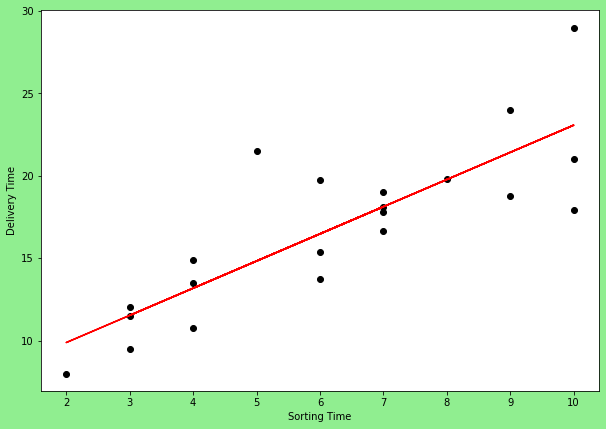

In [80]:
plt.figure(figsize=(10,7),facecolor="lightgreen")
plt.scatter(dt.stime,dt.dtime,color="black");
plt.plot(dt.stime,dt.stime*reg_sklearn.coef_[0]+reg_sklearn.intercept_,color="red");
plt.xlabel("Sorting Time");
plt.ylabel("Delivery Time")
plt.show()

# Model Validation

In [81]:
pred_train_lm =reg_sklearn.predict(X)
r2_score(dt["dtime"],pred_train_lm)

0.6822714748417231

# Model with Stats Model

In [82]:
dt.head(5)

,dtime,stime
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [83]:
model=smf.ols("dtime~stime",data=dt).fit()

In [84]:
pred_statsmodel = model.predict(dt["stime"])

In [85]:
r2_score(dt["dtime"],pred_train_lm)

0.6822714748417231

In [86]:
model.params

Intercept    6.582734
stime        1.649020
dtype: float64

In [87]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  dtime   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sat, 28 Aug 2021   Prob (F-statistic):           3.98e-06
Time:                        10:22:38   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
stime          1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [88]:
model2 = smf.ols('dtime~np.log(stime)',data=dt).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  dtime   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Sat, 28 Aug 2021   Prob (F-statistic):           2.64e-06
Time:                        10:22:38   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(stime)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [89]:
model3 = smf.ols('np.log(dtime)~stime',data=dt).fit()
model3.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(dtime)   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     46.73
Date:                Sat, 28 Aug 2021   Prob (F-statistic):           1.59e-06
Time:                        10:22:38   Log-Likelihood:                 7.7920
No. Observations:                  21   AIC:                            -11.58
Df Residuals:                      19   BIC:                            -9.495
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1214      0.103     20.601      0.000       1.906       2.337
stime          0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [90]:
dt["stime_Sq"] = dt.stime**2
model_quad = smf.ols("np.log(dtime)~stime+stime_Sq",data=dt).fit()
# model_quad.params
model_quad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(dtime)   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     29.28
Date:                Sat, 28 Aug 2021   Prob (F-statistic):           2.20e-06
Time:                        10:22:39   Log-Likelihood:                 9.9597
No. Observations:                  21   AIC:                            -13.92
Df Residuals:                      18   BIC:                            -10.79
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6997      0.228      7.441      0.000       1.220       2.180
stime          0.2659      0.080      3.315      0.004       0.097       0.434
stime_Sq      -0.0128      0.006     -2.032      0.057      -0.026       0.000
==============================================================================
Omnibus:                        2.548   Durbin-Watson:                   1.369
Prob(Omnibus):                  0.280   Jarque-Bera (JB):                1.777
Skew:                           0.708   Prob(JB):                        0.411
Kurtosis:                       2.846   Cond. No.                         373.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Model Predictions

In [91]:
# Manual prediction for say sorting time 5
dtime = (6.582734) + (1.649020)*(5)
dtime

14.827834

In [92]:
# Automatic Prediction for say sorting time 5, 8
new_data=pd.Series([5,8])
new_data

0    5
1    8
dtype: int64

In [93]:
data_pred=pd.DataFrame(new_data,columns=['stime'])
data_pred

,stime
0,5
1,8


In [94]:
model.predict(data_pred)

0    14.827833
1    19.774893
dtype: float64

# (2) Simple Linear Regression - Salary_hike

Q2) Salary_hike -> Build a prediction model for Salary_hike Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

In [96]:
sal_hike=pd.read_csv("Salary_Data.csv")

In [97]:
sal_hike.head(5)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [98]:
sal_hike.shape

(30, 2)

In [99]:
sal_hike.dtypes

YearsExperience    float64
Salary             float64
dtype: object

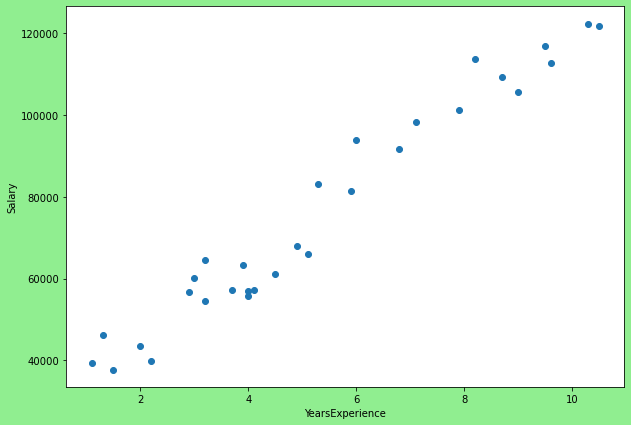

In [100]:
plt.figure(figsize=(10,7),facecolor="lightgreen")
plt.scatter(sal_hike.YearsExperience,sal_hike.Salary);
plt.xlabel("YearsExperience");
plt.ylabel("Salary")
plt.show()

In [101]:
sal_hike.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


# Creating Model with SKLEARN

In [102]:
lm = LinearRegression()

X = sal_hike["YearsExperience"].values.reshape(30,1)
Y = sal_hike["Salary"].values.reshape(30,1)

reg_sklearn = lm.fit(X,Y)

In [103]:
X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [104]:
Y

array([[ 39343.],
       [ 46205.],
       [ 37731.],
       [ 43525.],
       [ 39891.],
       [ 56642.],
       [ 60150.],
       [ 54445.],
       [ 64445.],
       [ 57189.],
       [ 63218.],
       [ 55794.],
       [ 56957.],
       [ 57081.],
       [ 61111.],
       [ 67938.],
       [ 66029.],
       [ 83088.],
       [ 81363.],
       [ 93940.],
       [ 91738.],
       [ 98273.],
       [101302.],
       [113812.],
       [109431.],
       [105582.],
       [116969.],
       [112635.],
       [122391.],
       [121872.]])

In [105]:
print (reg_sklearn.coef_)
print (reg_sklearn.intercept_)

[[9449.96232146]]
[25792.20019867]


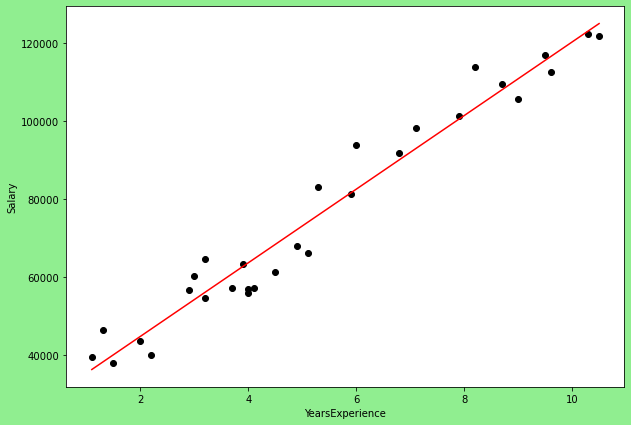

In [106]:
plt.figure(figsize=(10,7),facecolor="lightgreen")
plt.scatter(sal_hike.YearsExperience,sal_hike.Salary,color="black");
plt.plot(sal_hike.YearsExperience,sal_hike.YearsExperience*reg_sklearn.coef_[0]+reg_sklearn.intercept_,color="red");
plt.xlabel("YearsExperience");
plt.ylabel("Salary")
plt.show()

# Model Validation

In [107]:
pred_train_lm =reg_sklearn.predict(X)
r2_score(sal_hike["Salary"],pred_train_lm)

0.9569566641435086

# Model with Statsmodels

In [108]:
sal_hike.head(5)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [109]:
model = smf.ols("Salary~YearsExperience",data=sal_hike).fit()

In [110]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [111]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sat, 28 Aug 2021   Prob (F-statistic):           1.14e-20
Time:                        10:22:42   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [112]:
model2 = smf.ols('Salary~np.log(YearsExperience)',data=sal_hike).fit()
model2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Sat, 28 Aug 2021   Prob (F-statistic):           3.25e-13
Time:                        10:22:42   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(YearsExperience)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [113]:
model3 = smf.ols('np.log(Salary)~YearsExperience',data=sal_hike).fit()
model3.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Sat, 28 Aug 2021   Prob (F-statistic):           7.03e-18
Time:                        10:22:43   Log-Likelihood:                 28.183
No. Observations:                  30   AIC:                            -52.37
Df Residuals:                      28   BIC:                            -49.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          10.5074      0.038    273.327      0.000      10.429      10.586
YearsExperience     0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [114]:
sal_hike["YearsExperience_Sq"] = sal_hike.YearsExperience**2
model_quad = smf.ols("np.log(Salary)~YearsExperience+YearsExperience_Sq",data=sal_hike).fit()
model_quad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     249.2
Date:                Sat, 28 Aug 2021   Prob (F-statistic):           3.95e-18
Time:                        10:22:43   Log-Likelihood:                 32.391
No. Observations:                  30   AIC:                            -58.78
Df Residuals:                      27   BIC:                            -54.58
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             10.3369      0.067    154.368      0.000      10.199      10.474
YearsExperience        0.2024      0.027      7.601      0.000       0.148       0.257
YearsExperience_Sq    -0.0066      0.002     -2.957      0.006      -0.011      -0.002
==============================================================================
Omnibus:                        1.099   Durbin-Watson:                   1.845
Prob(Omnibus):                  0.577   Jarque-Bera (JB):                1.002
Skew:                           0.260   Prob(JB):                        0.606
Kurtosis:                       2.271   Cond. No.                         223.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Model Predictions

In [115]:
# Manual prediction for say 3 Years Experience
Salary = (25792.200199) + (9449.962321)*(3)
Salary

54142.087162

In [116]:
# Automatic Prediction for say 3 & 5 Years Experience

In [117]:
new_data=pd.Series([3,5])
new_data

0    3
1    5
dtype: int64

In [118]:
data_pred=pd.DataFrame(new_data,columns=['YearsExperience'])
data_pred

,YearsExperience
0,3
1,5


In [119]:
model.predict(data_pred)

0    54142.087163
1    73042.011806
dtype: float64